<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Read-financial-data" data-toc-modified-id="Read-financial-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read financial data</a></span></li><li><span><a href="#Read-temperature-data" data-toc-modified-id="Read-temperature-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read temperature data</a></span><ul class="toc-item"><li><span><a href="#Montly-temp-differ-data" data-toc-modified-id="Montly-temp-differ-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Montly temp differ data</a></span></li><li><span><a href="#Yearly-temp-differ-data" data-toc-modified-id="Yearly-temp-differ-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Yearly temp differ data</a></span></li><li><span><a href="#Bushfire-data" data-toc-modified-id="Bushfire-data-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Bushfire data</a></span></li></ul></li></ul></li><li><span><a href="#US-Average-Temp-difference-Correlation-Analysis" data-toc-modified-id="US-Average-Temp-difference-Correlation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Average Temp difference Correlation Analysis</a></span><ul class="toc-item"><li><span><a href="#Monthly" data-toc-modified-id="Monthly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monthly</a></span></li><li><span><a href="#Yearly" data-toc-modified-id="Yearly-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Yearly</a></span></li></ul></li><li><span><a href="#Temp-difference-on-States" data-toc-modified-id="Temp-difference-on-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temp difference on States</a></span><ul class="toc-item"><li><span><a href="#1-year" data-toc-modified-id="1-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1 year</a></span></li><li><span><a href="#2-Year" data-toc-modified-id="2-Year-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2 Year</a></span></li><li><span><a href="#3-Year" data-toc-modified-id="3-Year-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>3 Year</a></span></li><li><span><a href="#4-Year" data-toc-modified-id="4-Year-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>4 Year</a></span></li><li><span><a href="#5-Year" data-toc-modified-id="5-Year-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>5 Year</a></span></li><li><span><a href="#6-Year" data-toc-modified-id="6-Year-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>6 Year</a></span></li><li><span><a href="#7-Year" data-toc-modified-id="7-Year-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>7 Year</a></span></li><li><span><a href="#8-Year" data-toc-modified-id="8-Year-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>8 Year</a></span></li><li><span><a href="#9-Year" data-toc-modified-id="9-Year-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>9 Year</a></span></li><li><span><a href="#10-Year" data-toc-modified-id="10-Year-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>10 Year</a></span></li></ul></li><li><span><a href="#Bushfires" data-toc-modified-id="Bushfires-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bushfires</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Person" data-toc-modified-id="Person-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Person</a></span></li><li><span><a href="#Spearman" data-toc-modified-id="Spearman-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Spearman</a></span></li><li><span><a href="#Kendall" data-toc-modified-id="Kendall-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Kendall</a></span></li></ul></li></ul></div>

# Set up

In [3]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import json
import re, datetime
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'geopy'

# Read data

## Read financial data

In [4]:
def toInt(l:list) -> list:
    for i in range(len(l)):
        l[i] = float(l[i])

root_path = os.path.abspath(os.path.dirname(os.getcwd()))
data_path = os.path.join(root_path, 'data')
agr_path = os.path.join(data_path, 'agriculture')

finc_data = []
for file in os.listdir(agr_path):
    if file.endswith('.json'):
        file_path = os.path.join(agr_path, file)
        with open(file_path, 'r') as file:
            finc_data.append(json.load(file))
        
ROA_data = {}
state_data = {}
for i in finc_data:
    for k, v in i.items():
        try:
            state_data[k] =  i[k]['state']
            ROA_data[k] = pd.DataFrame.from_dict(i[k]['ROA']) 
        except:
            pass

In [30]:
ROA_data

{'AVD':     name 12/31/2020 12/31/2019 12/31/2018 12/31/2017 12/31/2016 12/31/2015  \
 142  ROA       0.03       0.03       0.05       0.04       0.04       0.02   
 
     12/31/2014 12/31/2013 12/31/2012  ... 12/31/1995 12/31/1994 12/31/1993  \
 142       0.02       0.12        0.1  ...       0.06       0.02       0.05   
 
     12/31/1992 12/31/1991 12/31/1990 12/31/1989 12/31/1988 12/31/1987  \
 142       0.04       0.01      -0.03       0.06       0.07       0.09   
 
     12/31/1986  
 142       0.05  
 
 [1 rows x 36 columns],
 'CF':     name   12/31/2020   12/31/2019   12/31/2018   12/31/2017    12/31/2016  \
 163  ROA  0.026366132  0.040502793  0.022904984  0.026591399  -0.018306787   
 
       12/31/2015   12/31/2014   12/31/2013   12/31/2012  ...   12/31/2010  \
 163  0.054941949  0.122620875  0.137159232  0.181835171  ...  0.039869841   
 
       12/31/2009   12/31/2008   12/31/2007   12/31/2006    12/31/2005  \
 163  0.146538939  0.286731446  0.185192547  0.025805952  -0.03

In [ ]:
# transform dict to pd
# pd.DataFrame.from_dict(finc_data[0]['RKDA']['stock prices']) 

## Read temperature data

### Montly temp differ data

In [5]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'monthly_temp_difference(1980-2013).csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_montly_data = pd.read_csv(file_path)

rename the time_difference

In [6]:
#提取monthly difference
time_diff = []
for i in temp_diff_montly_data["Time_Difference"]:
    i = i.split('-')
    month = re.compile(r'(?<= )\d+(?=])')
    month = re.search(month, i[-1])[0] # get the month
    i = month + '/31/' + i[0]
    time_diff.append(i)
temp_diff_montly_data["Time_Difference"] = time_diff

In [7]:
temp_diff_montly_data

,Time_Difference,Temperature_Difference
0,1/31/1981,-0.674431
1,2/31/1981,2.942745
2,3/31/1981,1.666627
3,4/31/1981,1.852000
4,5/31/1981,-0.872549
...,...,...
387,4/31/2013,-2.254216
388,5/31/2013,-1.723510
389,6/31/2013,0.102137
390,7/31/2013,-1.328706


### Yearly temp differ data

In [9]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'Yearly_temp_difference.csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_yearly_data = pd.read_csv(file_path)

In [10]:
temp_diff_yearly_data

,Year,Average_temperature_U.S.,Difference
0,1980,11.070567,NaN
1,1981,11.392531,0.321964
2,1982,10.746593,-0.645938
3,1983,11.064253,0.317660
4,1984,11.079909,0.015655
5,1985,10.795742,-0.284167
6,1986,11.614054,0.818312
7,1987,11.692711,0.078657
8,1988,11.198328,-0.494382
9,1989,10.792611,-0.405717


### Bushfire data

In [11]:
climate_path = os.path.join(data_path, 'climate')

file_name = 'Wildfire_data.csv'
file_path = os.path.join(climate_path, file_name)
bushfire_data = pd.read_csv(file_path)

# US Average Temp difference Correlation Analysis

1. `SEED` = ROA varies a little
2. cluster between ROA and temperature

In [25]:
#定义关系分析function
def corr_ana(l1:list, l2:list, x, y):
    assert len(roa_data) == len(temp_data)
    if len(l1) > 5:
        # Pearson correlation
        pearson = pearsonr(l1, l2)[0]
        p_p_value = pearsonr(l1, l2)[1]
        # Spearman correlation
        spearman = spearmanr(l1, l2)[0]
        s_p_value = spearmanr(l1, l2)[1]
        # Kendall correlation
        tau, k_p_value = kendalltau(l1, l2)
        # print the results
        print("""Correlation analysis between {comp} and {y}:
        Perason coefficient is {pearson:.3f} with {p_p_value:.3f} p-value.
        Spearman coefficient is {spearman:.3f} with {s_p_value:.3f} p-value.
        Kendall coefficient is {kendall:.3f} with {k_p_value:.3f} p-value.
        """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
                    spearman = spearman, s_p_value = s_p_value, 
                     kendall = tau, k_p_value = k_p_value, y = y))
        plt.scatter(l1, l2)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    else:
        print("\nData Insufficient.\n")

## Monthly

In [32]:
for comp in ROA_data.keys():
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        try: 
            t = temp_diff_montly_data.loc[temp_diff_montly_data['Time_Difference'] == i]['Temperature_Difference']
            #print(t)
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i].values[0]
                roa = float(roa)
                if roa and not np.isnan(roa): # to aviod nan value
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
        # try correlation analysis
    print(roa_data)
    #corr_ana(roa_data, temp_data, 'ROA', 'Monthly Temp Diff')
    

[0.1, 0.06, 0.04, -0.03, 0.1, 0.08, 0.07, 0.1, 0.08, 0.07, 0.06, 0.06, 0.05, 0.04, 0.03, 0.03, 0.02, 0.06, 0.02, 0.05, 0.04, 0.01, -0.03, 0.06, 0.07, 0.09, 0.05]
[0.181835171, 0.171508162, 0.039869841, 0.146538939, 0.286731446, 0.185192547, 0.025805952, -0.031756372, 0.043783626, -0.012998022, -0.021260498]
[]
[]
[]
[0.095155353, 0.097742754, 0.051959396, 0.072858874, 0.101740205, 0.048437843, 0.048263254, 0.042554745, 0.053787268, 0.00936793, 0.022910864, -0.136323268, 0.029525615, 0.053205866, 0.025561636, 0.039483601, 0.042226141, 0.050126712, 0.051738028, 0.012903914, -0.026781292, 0.061478903, 0.0524804, 0.055587088, 0.047002328, 0.073677315, 0.056780103]
[0.087915723, 0.117284295, 0.0546337, 0.071967126, 0.139237275, 0.20230695, 0.278565018]
[-1.148499023, -1.342432267]
[0.009952749]
[-0.036886697, -0.030298864, -0.01565111, -0.08095551, -0.148828884, -0.001393858, 0.013457712]
[-0.925967513]
[]
[0.346718283, 0.438117952, 0.109969062, 0.320710597, 0.570780003]
[0.067837787, -0.46

## Yearly


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is 0.336 with 0.313 p-value.
        Spearman coefficient is 0.191 with 0.574 p-value.
        Kendall coefficient is 0.055 with 0.879 p-value.
        


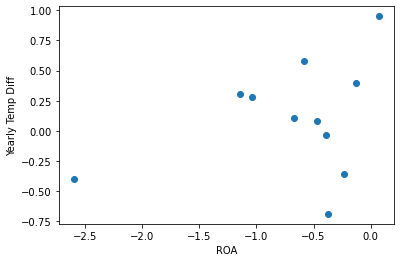

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.166 with 0.400 p-value.
        Spearman coefficient is -0.059 with 0.766 p-value.
        Kendall coefficient is -0.022 with 0.874 p-value.
        


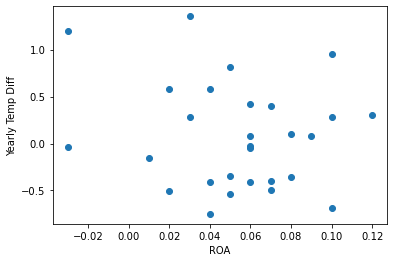


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.252 with 0.546 p-value.
        Spearman coefficient is -0.333 with 0.420 p-value.
        Kendall coefficient is -0.214 with 0.548 p-value.
        


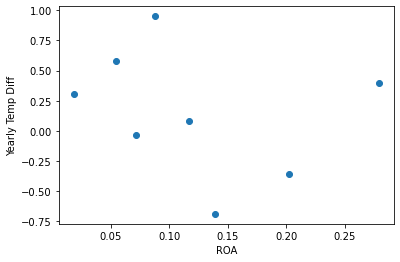

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is -0.008 with 0.968 p-value.
        Spearman coefficient is -0.149 with 0.466 p-value.
        Kendall coefficient is -0.108 with 0.457 p-value.
        


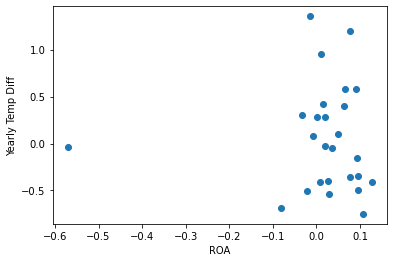

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.043 with 0.840 p-value.
        Spearman coefficient is 0.182 with 0.395 p-value.
        Kendall coefficient is 0.159 with 0.290 p-value.
        


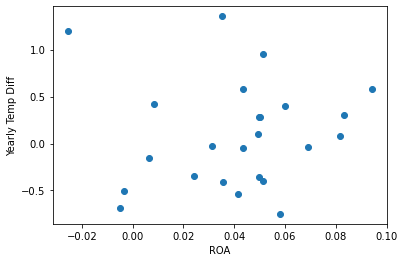

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.037 with 0.851 p-value.
        Spearman coefficient is 0.147 with 0.455 p-value.
        Kendall coefficient is 0.132 with 0.336 p-value.
        


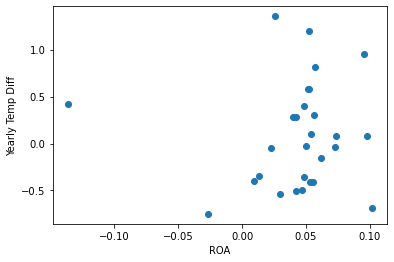


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.673 with 0.143 p-value.
        Spearman coefficient is -0.543 with 0.266 p-value.
        Kendall coefficient is -0.467 with 0.272 p-value.
        


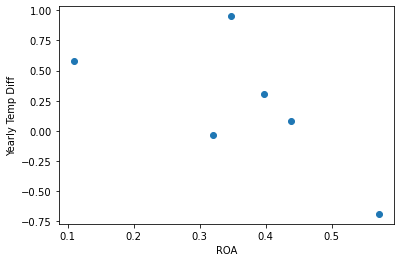

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is -0.232 with 0.467 p-value.
        Spearman coefficient is -0.182 with 0.572 p-value.
        Kendall coefficient is -0.152 with 0.545 p-value.
        


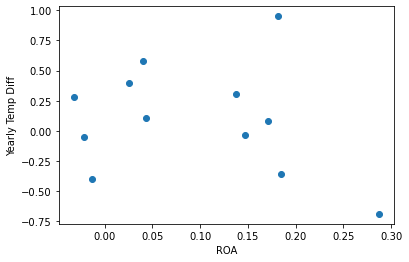


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is 0.126 with 0.539 p-value.
        Spearman coefficient is 0.166 with 0.418 p-value.
        Kendall coefficient is 0.105 with 0.453 p-value.
        


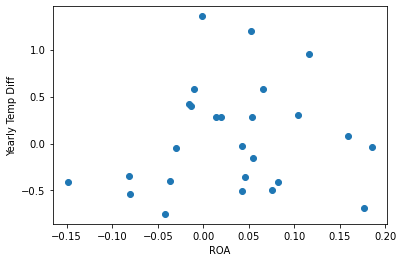

In [10]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        year = i.split('/')[-1]
        try: 
            t = temp_diff_yearly_data.loc[temp_diff_yearly_data['Year'] == int(year)]['Difference']
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

# Temp difference on States

In [11]:
# get us companies
us_comps = []

for comp in finc_data:
    name = list(comp.keys())[0]
    if comp[name]['location'][-1] == 'United States':
        us_comps.append(comp)

# read raw temp data
climate_path = os.path.join(climate_path, 'US_temperature_data')
file_name = 'original_temp_data.csv'
file_path = os.path.join(climate_path, file_name)
raw_temp_date = pd.read_csv(file_path)

Want I want = the pairs of (ROA, temp differ)

The logic:

1. get the state of the company
2. get the state temperature 
3. according to the company's ROA date, get the timeline which helps us to find the corresponding temperature data
4. temperature difference = current year avg. temp - the past *n* years avg. temp

In [35]:
def temp_diff_roa_pairs(skip: int, comp):
    """
    :i = the past n year(s)
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        try:
            i = i.split('/')
            roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        except:
            pass
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    temp_curr_avg = []
    temp_past_avg = []
    roa_index = []
    # for each interval(elementc) in roa, we need to find the corresponding temp difference
    # the corresponding temp difference = the current avg. temp - the avg. temp over past n years in the same interval
    for roa in range(len(roa_time)):
        now = roa_time[roa]
        now_year = roa_time[roa].year
        now_month = roa_time[roa].month
        now_day = roa_time[roa].day
        try: # use exisiting data to get the interval
            past = roa_time[roa + 1]
            past_year = roa_time[roa + 1].year
            past_month = roa_time[roa + 1].month
            past_day = roa_time[roa + 1].day
        except: # assume the past year for the last element
            past_year = now_year - 1
            past_month = now_month
            past_day = now_day
            past = datetime.date(past_year, past_month, past_day)
        temp_sum = 0
        temp_count = 0
        # get current year
        for temp in range(len(state_temp_time)):
            if past <= state_temp_time[temp] < now:
                year = str(state_temp_time[temp].year)
                month = str(state_temp_time[temp].month)
                day = str(state_temp_time[temp].day)
                timestamp = year + '/' + month + '/' + day
                temp_sum += state_temp.loc[timestamp].values[0]
                temp_count += 1       
        if temp_count == 0:
            continue
        temp_curr_avg.append(temp_sum/temp_count)
        temp_count = 0
        # get the past year
        for n in range(1, skip+1):
            now_year -= n
            past_year -= n
            now = datetime.date(now_year, now_month, now_day)
            past = datetime.date(past_year, past_month, past_day)
            for temp in range(len(state_temp_time)):
                if past <= state_temp_time[temp] < now:
                    year = str(state_temp_time[temp].year)
                    month = str(state_temp_time[temp].month)
                    day = str(state_temp_time[temp].day)
                    timestamp = year + '/' + month + '/' + day
                    temp_sum += state_temp.loc[timestamp].values[0]
                    temp_count += 1
        temp_past_avg.append(temp_sum/temp_count)
        roa_index.append(roa)
    roa_data = []
    count = 0
    # get roa_data
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        count += 1
        if count in roa_index:
            roa_data.append(float(ROA_data[comp][i].values[0]))
    # get temp difference
    temp_diff = [a + b for a, b in zip(temp_curr_avg, temp_past_avg)]
    return temp_diff, roa_data

## 1 year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.147 with 0.648 p-value.
        Spearman coefficient is -0.042 with 0.897 p-value.
        Kendall coefficient is 0.091 with 0.737 p-value.
        


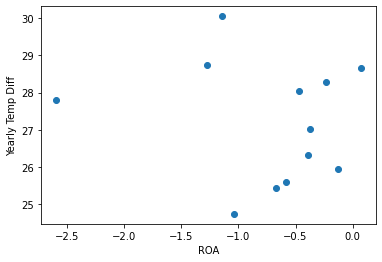

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is 0.054 with 0.783 p-value.
        Spearman coefficient is 0.090 with 0.648 p-value.
        Kendall coefficient is 0.060 with 0.662 p-value.
        


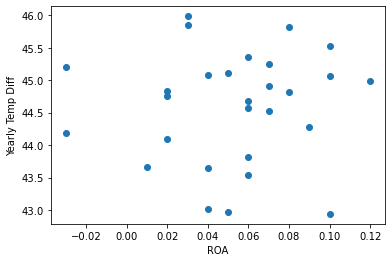


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.223 with 0.596 p-value.
        Spearman coefficient is -0.167 with 0.693 p-value.
        Kendall coefficient is 0.071 with 0.905 p-value.
        


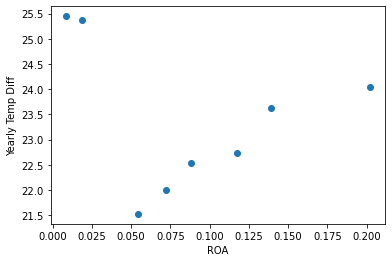

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.028 with 0.893 p-value.
        Spearman coefficient is 0.158 with 0.442 p-value.
        Kendall coefficient is 0.108 with 0.457 p-value.
        


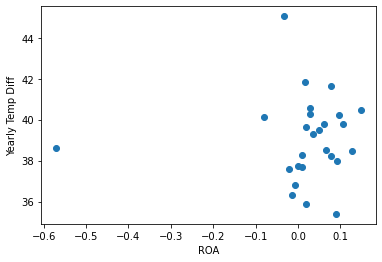

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.209 with 0.326 p-value.
        Spearman coefficient is 0.266 with 0.209 p-value.
        Kendall coefficient is 0.174 with 0.247 p-value.
        


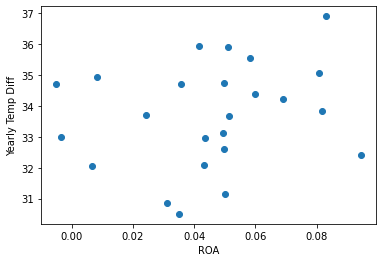

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.028 with 0.888 p-value.
        Spearman coefficient is 0.136 with 0.489 p-value.
        Kendall coefficient is 0.095 with 0.493 p-value.
        


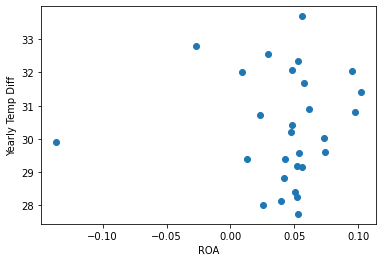


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is 0.310 with 0.550 p-value.
        Spearman coefficient is 0.371 with 0.468 p-value.
        Kendall coefficient is 0.333 with 0.469 p-value.
        


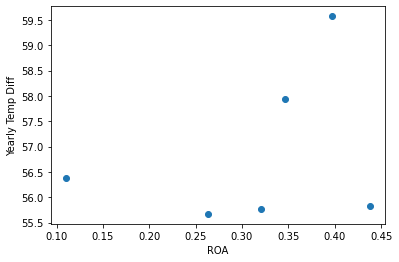

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.362 with 0.224 p-value.
        Spearman coefficient is 0.335 with 0.263 p-value.
        Kendall coefficient is 0.256 with 0.252 p-value.
        


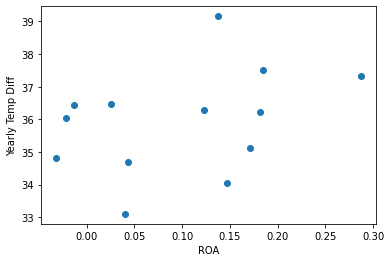


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.125 with 0.533 p-value.
        Spearman coefficient is -0.147 with 0.466 p-value.
        Kendall coefficient is -0.094 with 0.508 p-value.
        


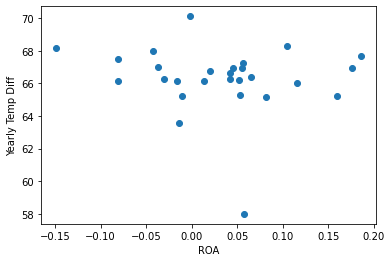

In [13]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(1, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 2 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.277 with 0.383 p-value.
        Spearman coefficient is -0.154 with 0.633 p-value.
        Kendall coefficient is -0.030 with 0.947 p-value.
        


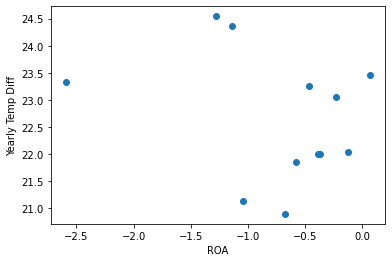

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is 0.074 with 0.708 p-value.
        Spearman coefficient is 0.102 with 0.606 p-value.
        Kendall coefficient is 0.082 with 0.551 p-value.
        


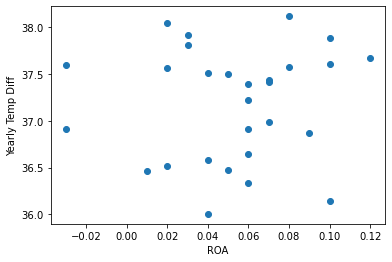


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.232 with 0.581 p-value.
        Spearman coefficient is -0.190 with 0.651 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


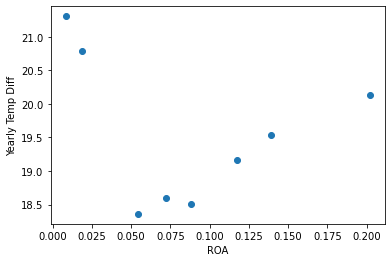

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.032 with 0.878 p-value.
        Spearman coefficient is 0.176 with 0.390 p-value.
        Kendall coefficient is 0.120 with 0.406 p-value.
        


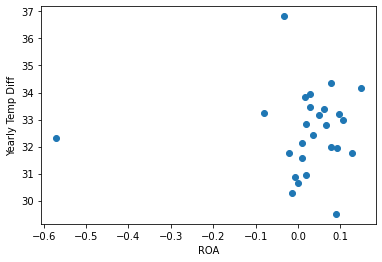

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.255 with 0.229 p-value.
        Spearman coefficient is 0.377 with 0.070 p-value.
        Kendall coefficient is 0.232 with 0.119 p-value.
        


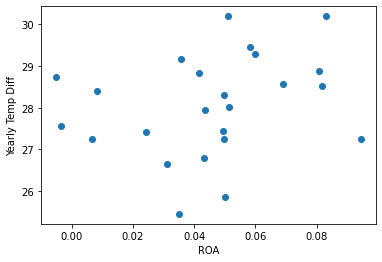

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.121 with 0.538 p-value.
        Spearman coefficient is 0.172 with 0.382 p-value.
        Kendall coefficient is 0.111 with 0.421 p-value.
        


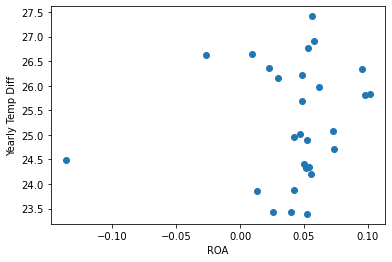


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is 0.070 with 0.896 p-value.
        Spearman coefficient is -0.086 with 0.872 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


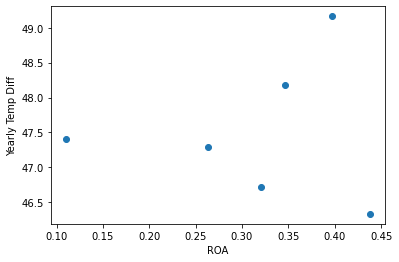

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.195 with 0.523 p-value.
        Spearman coefficient is 0.165 with 0.590 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


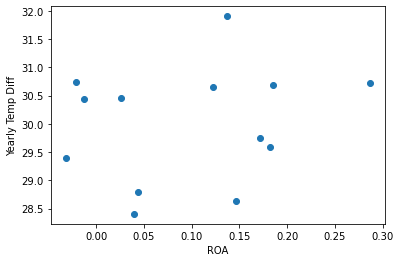


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.113 with 0.574 p-value.
        Spearman coefficient is -0.113 with 0.575 p-value.
        Kendall coefficient is -0.071 with 0.620 p-value.
        


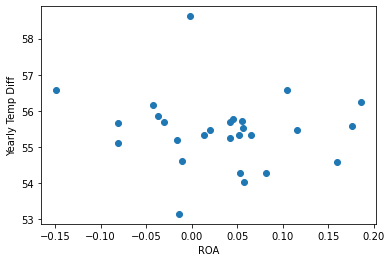

In [14]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(2, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 3 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.223 with 0.486 p-value.
        Spearman coefficient is -0.119 with 0.713 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


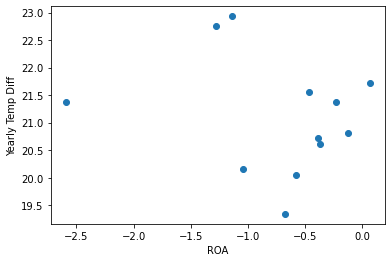

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is 0.074 with 0.709 p-value.
        Spearman coefficient is 0.091 with 0.647 p-value.
        Kendall coefficient is 0.077 with 0.578 p-value.
        


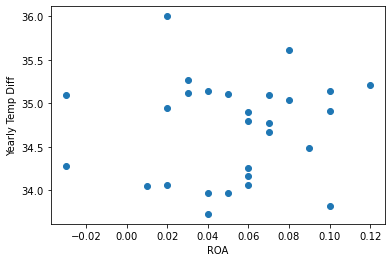


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.265 with 0.526 p-value.
        Spearman coefficient is -0.190 with 0.651 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


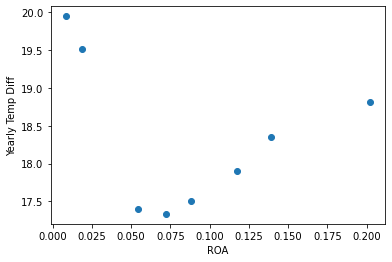

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is -0.018 with 0.929 p-value.
        Spearman coefficient is 0.110 with 0.594 p-value.
        Kendall coefficient is 0.083 with 0.570 p-value.
        


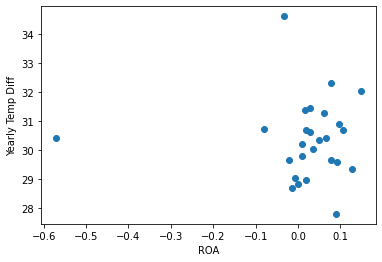

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.312 with 0.137 p-value.
        Spearman coefficient is 0.430 with 0.036 p-value.
        Kendall coefficient is 0.254 with 0.087 p-value.
        


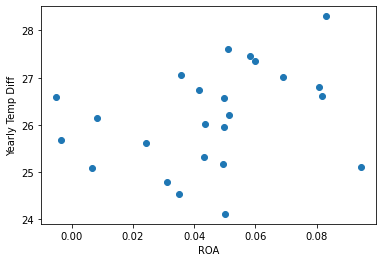

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.164 with 0.404 p-value.
        Spearman coefficient is 0.216 with 0.269 p-value.
        Kendall coefficient is 0.122 with 0.377 p-value.
        


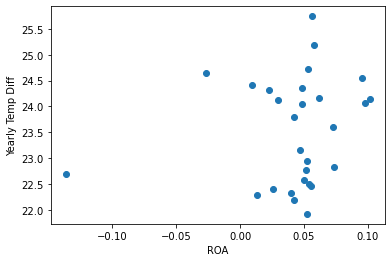


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is 0.091 with 0.863 p-value.
        Spearman coefficient is -0.029 with 0.957 p-value.
        Kendall coefficient is 0.067 with 1.000 p-value.
        


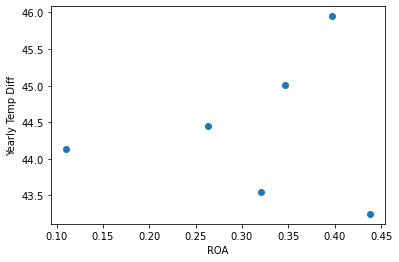

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.263 with 0.386 p-value.
        Spearman coefficient is 0.165 with 0.590 p-value.
        Kendall coefficient is 0.179 with 0.435 p-value.
        


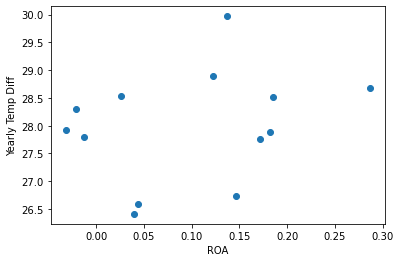


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.051 with 0.800 p-value.
        Spearman coefficient is -0.065 with 0.746 p-value.
        Kendall coefficient is -0.066 with 0.650 p-value.
        


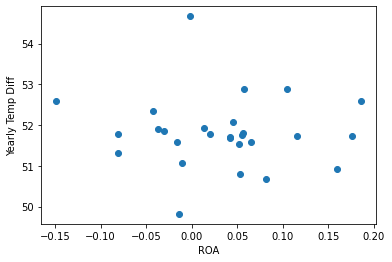

In [15]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(3, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 4 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.143 with 0.657 p-value.
        Spearman coefficient is -0.063 with 0.846 p-value.
        Kendall coefficient is 0.030 with 0.947 p-value.
        


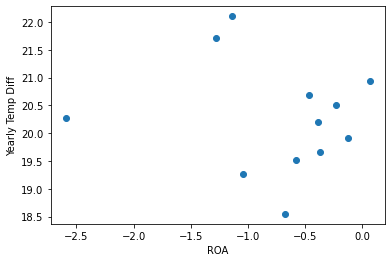

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is 0.067 with 0.734 p-value.
        Spearman coefficient is 0.199 with 0.309 p-value.
        Kendall coefficient is 0.154 with 0.265 p-value.
        


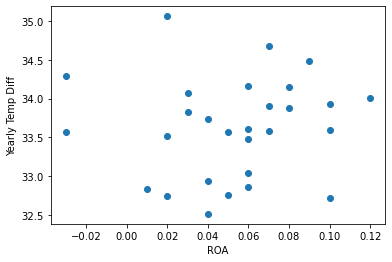


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.356 with 0.387 p-value.
        Spearman coefficient is -0.190 with 0.651 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


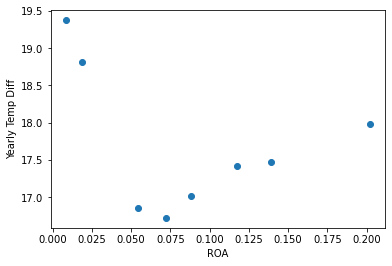

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.034 with 0.869 p-value.
        Spearman coefficient is 0.291 with 0.149 p-value.
        Kendall coefficient is 0.206 with 0.147 p-value.
        


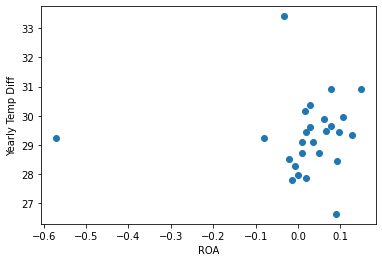

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.323 with 0.124 p-value.
        Spearman coefficient is 0.418 with 0.042 p-value.
        Kendall coefficient is 0.254 with 0.087 p-value.
        


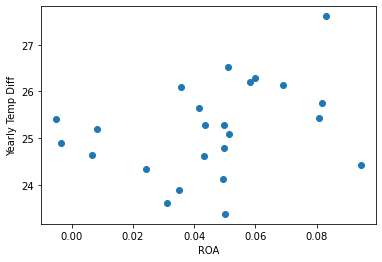

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.190 with 0.334 p-value.
        Spearman coefficient is 0.276 with 0.155 p-value.
        Kendall coefficient is 0.185 with 0.174 p-value.
        


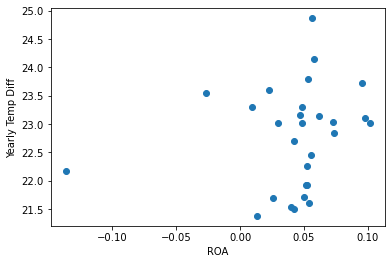


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is 0.043 with 0.935 p-value.
        Spearman coefficient is -0.029 with 0.957 p-value.
        Kendall coefficient is 0.067 with 1.000 p-value.
        


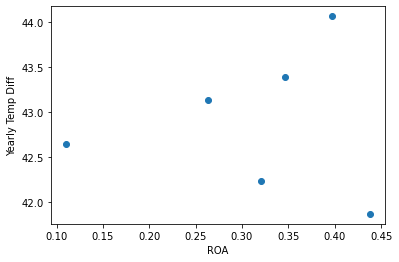

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.246 with 0.418 p-value.
        Spearman coefficient is 0.088 with 0.775 p-value.
        Kendall coefficient is 0.103 with 0.675 p-value.
        


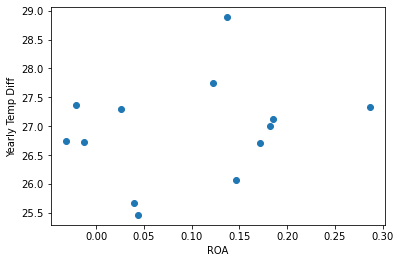


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is 0.068 with 0.737 p-value.
        Spearman coefficient is 0.130 with 0.518 p-value.
        Kendall coefficient is 0.066 with 0.650 p-value.
        


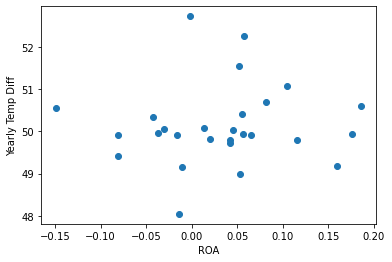

In [16]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(4, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 5 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.136 with 0.674 p-value.
        Spearman coefficient is -0.028 with 0.931 p-value.
        Kendall coefficient is 0.061 with 0.841 p-value.
        


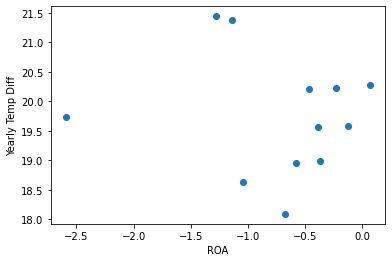

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.021 with 0.914 p-value.
        Spearman coefficient is 0.123 with 0.532 p-value.
        Kendall coefficient is 0.104 with 0.450 p-value.
        


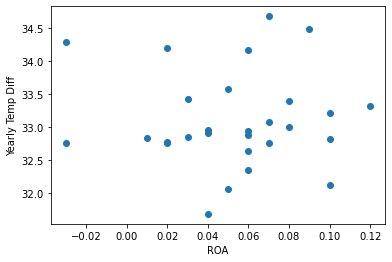


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.379 with 0.355 p-value.
        Spearman coefficient is -0.190 with 0.651 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


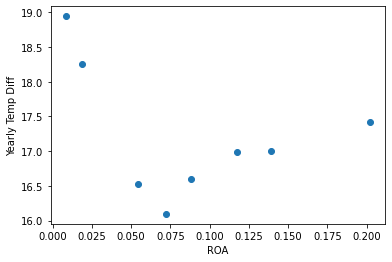

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.185 with 0.366 p-value.
        Spearman coefficient is 0.431 with 0.028 p-value.
        Kendall coefficient is 0.348 with 0.013 p-value.
        


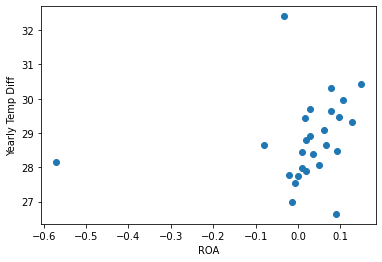

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.208 with 0.330 p-value.
        Spearman coefficient is 0.319 with 0.129 p-value.
        Kendall coefficient is 0.174 with 0.247 p-value.
        


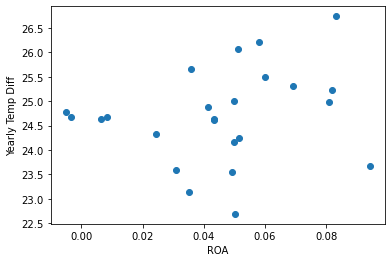

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.169 with 0.390 p-value.
        Spearman coefficient is 0.264 with 0.175 p-value.
        Kendall coefficient is 0.159 with 0.246 p-value.
        


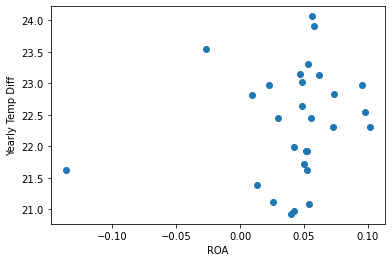


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.030 with 0.956 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


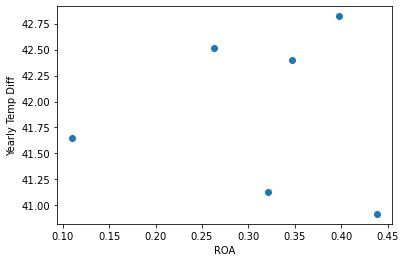

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.205 with 0.503 p-value.
        Spearman coefficient is 0.060 with 0.845 p-value.
        Kendall coefficient is 0.103 with 0.675 p-value.
        


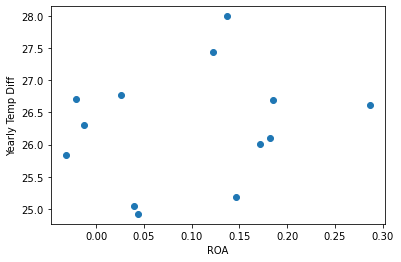


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is 0.009 with 0.965 p-value.
        Spearman coefficient is -0.012 with 0.952 p-value.
        Kendall coefficient is -0.009 with 0.967 p-value.
        


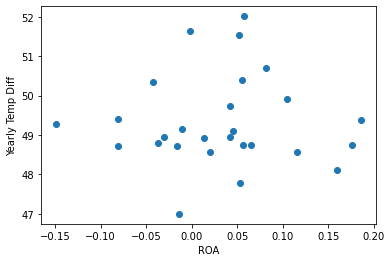

In [17]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(5, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 6 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.129 with 0.690 p-value.
        Spearman coefficient is -0.021 with 0.948 p-value.
        Kendall coefficient is 0.091 with 0.737 p-value.
        


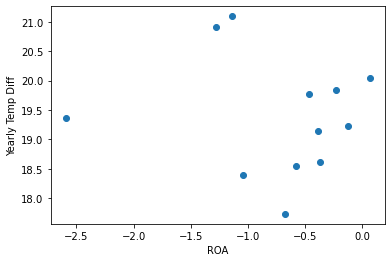

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.168 with 0.393 p-value.
        Spearman coefficient is -0.237 with 0.225 p-value.
        Kendall coefficient is -0.143 with 0.301 p-value.
        


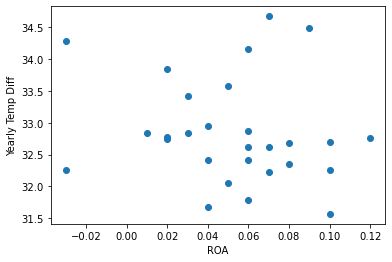


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.400 with 0.326 p-value.
        Spearman coefficient is -0.190 with 0.651 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


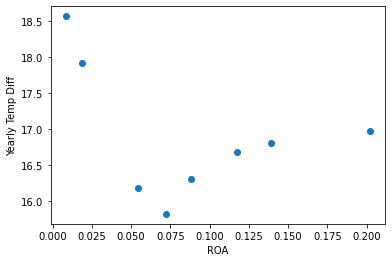

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.214 with 0.294 p-value.
        Spearman coefficient is 0.433 with 0.027 p-value.
        Kendall coefficient is 0.329 with 0.018 p-value.
        


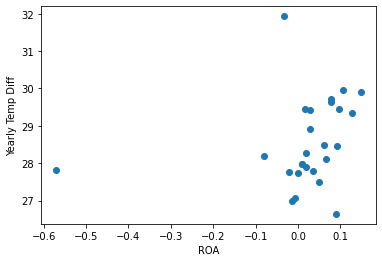

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is 0.079 with 0.715 p-value.
        Spearman coefficient is 0.159 with 0.458 p-value.
        Kendall coefficient is 0.072 with 0.641 p-value.
        


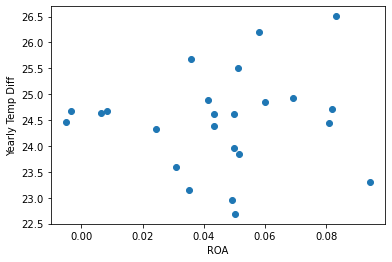

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.107 with 0.590 p-value.
        Spearman coefficient is 0.281 with 0.148 p-value.
        Kendall coefficient is 0.180 with 0.187 p-value.
        


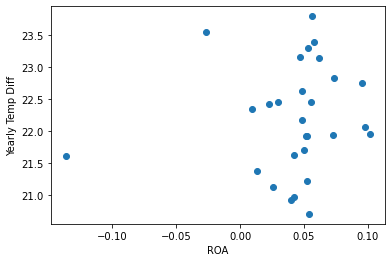


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.011 with 0.983 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


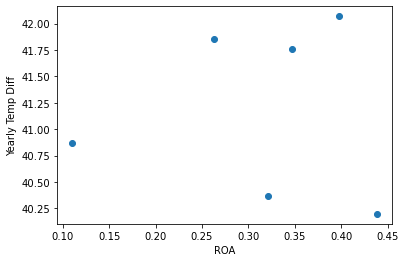

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.237 with 0.436 p-value.
        Spearman coefficient is 0.126 with 0.681 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


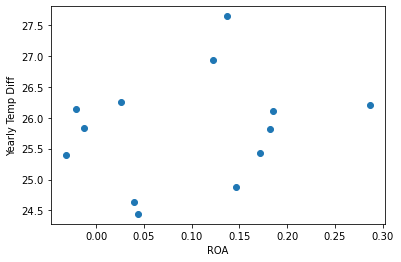


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.107 with 0.594 p-value.
        Spearman coefficient is -0.182 with 0.364 p-value.
        Kendall coefficient is -0.105 with 0.457 p-value.
        


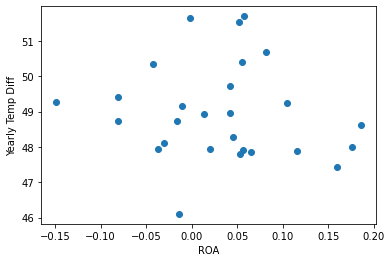

In [18]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(6, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 7 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.161 with 0.618 p-value.
        Spearman coefficient is -0.049 with 0.880 p-value.
        Kendall coefficient is 0.030 with 0.947 p-value.
        


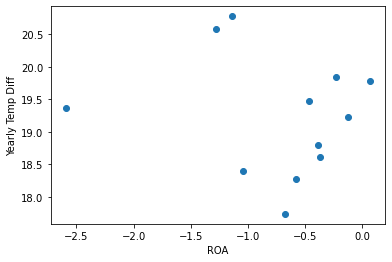

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.159 with 0.418 p-value.
        Spearman coefficient is -0.216 with 0.270 p-value.
        Kendall coefficient is -0.137 with 0.320 p-value.
        


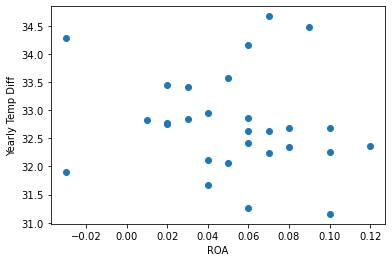


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.309 with 0.457 p-value.
        Spearman coefficient is -0.238 with 0.570 p-value.
        Kendall coefficient is -0.071 with 0.905 p-value.
        


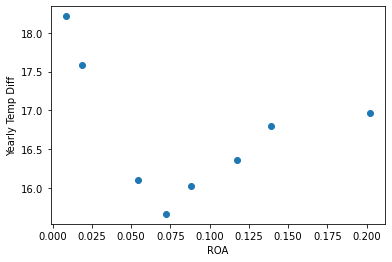

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.277 with 0.170 p-value.
        Spearman coefficient is 0.432 with 0.028 p-value.
        Kendall coefficient is 0.317 with 0.023 p-value.
        


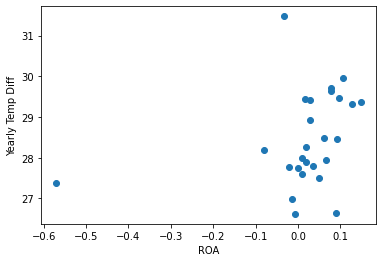

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is -0.047 with 0.826 p-value.
        Spearman coefficient is -0.014 with 0.949 p-value.
        Kendall coefficient is -0.036 with 0.825 p-value.
        


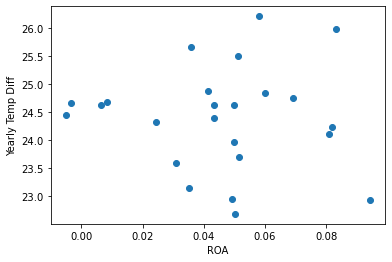

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.050 with 0.799 p-value.
        Spearman coefficient is 0.182 with 0.353 p-value.
        Kendall coefficient is 0.106 with 0.445 p-value.
        


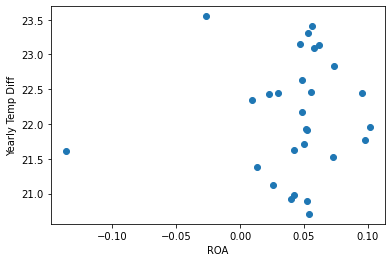


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.026 with 0.960 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


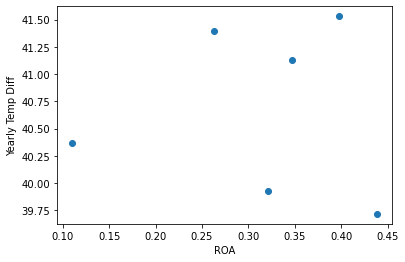

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.158 with 0.607 p-value.
        Spearman coefficient is 0.082 with 0.789 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


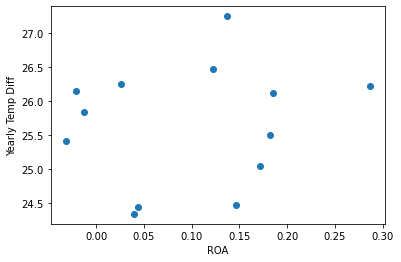


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.193 with 0.334 p-value.
        Spearman coefficient is -0.247 with 0.214 p-value.
        Kendall coefficient is -0.162 with 0.246 p-value.
        


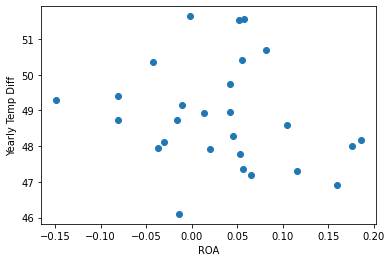

In [19]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(7, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 8 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.161 with 0.618 p-value.
        Spearman coefficient is -0.049 with 0.880 p-value.
        Kendall coefficient is 0.030 with 0.947 p-value.
        


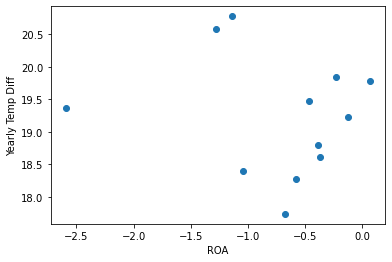

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.159 with 0.418 p-value.
        Spearman coefficient is -0.216 with 0.270 p-value.
        Kendall coefficient is -0.137 with 0.320 p-value.
        


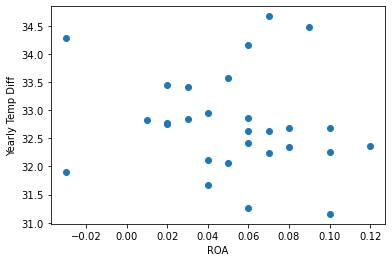


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.309 with 0.457 p-value.
        Spearman coefficient is -0.238 with 0.570 p-value.
        Kendall coefficient is -0.071 with 0.905 p-value.
        


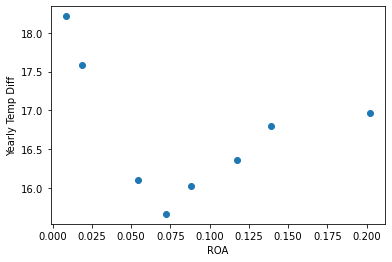

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.277 with 0.170 p-value.
        Spearman coefficient is 0.432 with 0.028 p-value.
        Kendall coefficient is 0.317 with 0.023 p-value.
        


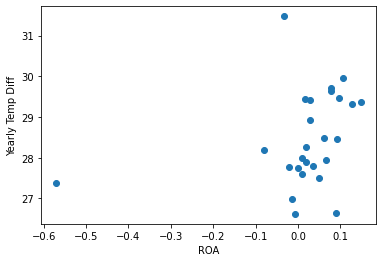

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is -0.047 with 0.826 p-value.
        Spearman coefficient is -0.014 with 0.949 p-value.
        Kendall coefficient is -0.036 with 0.825 p-value.
        


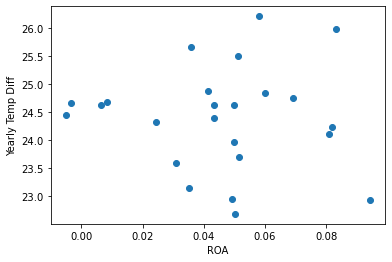

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.050 with 0.799 p-value.
        Spearman coefficient is 0.182 with 0.353 p-value.
        Kendall coefficient is 0.106 with 0.445 p-value.
        


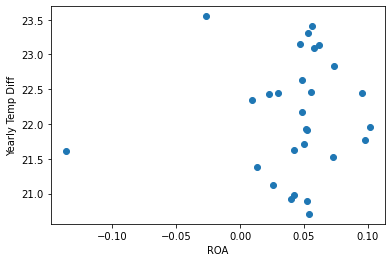


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.026 with 0.960 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


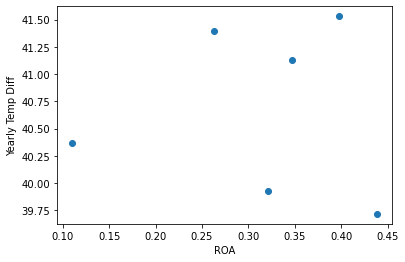

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.158 with 0.607 p-value.
        Spearman coefficient is 0.082 with 0.789 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


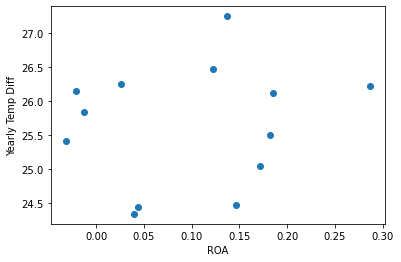


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.193 with 0.334 p-value.
        Spearman coefficient is -0.247 with 0.214 p-value.
        Kendall coefficient is -0.162 with 0.246 p-value.
        


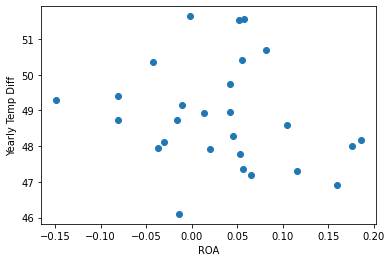

In [20]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(8, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 9 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.161 with 0.618 p-value.
        Spearman coefficient is -0.049 with 0.880 p-value.
        Kendall coefficient is 0.030 with 0.947 p-value.
        


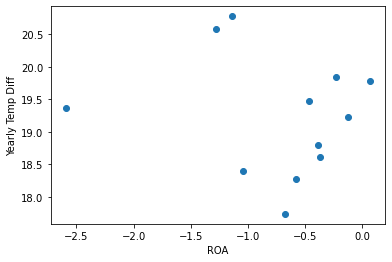

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.159 with 0.418 p-value.
        Spearman coefficient is -0.216 with 0.270 p-value.
        Kendall coefficient is -0.137 with 0.320 p-value.
        


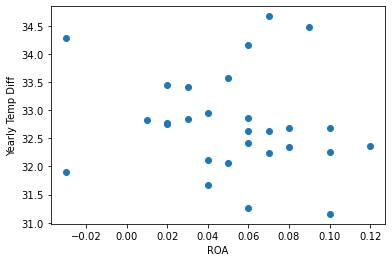


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.309 with 0.457 p-value.
        Spearman coefficient is -0.238 with 0.570 p-value.
        Kendall coefficient is -0.071 with 0.905 p-value.
        


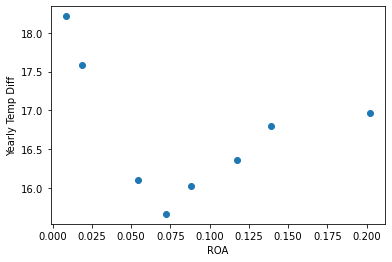

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.277 with 0.170 p-value.
        Spearman coefficient is 0.432 with 0.028 p-value.
        Kendall coefficient is 0.317 with 0.023 p-value.
        


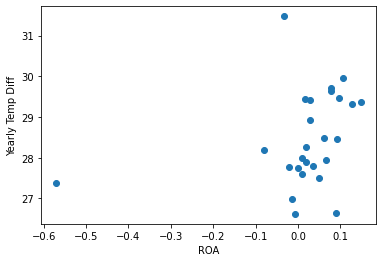

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is -0.047 with 0.826 p-value.
        Spearman coefficient is -0.014 with 0.949 p-value.
        Kendall coefficient is -0.036 with 0.825 p-value.
        


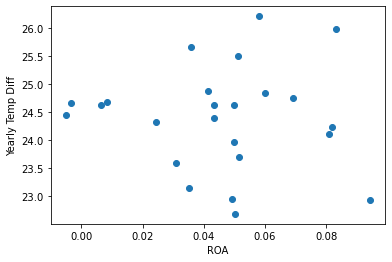

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.050 with 0.799 p-value.
        Spearman coefficient is 0.182 with 0.353 p-value.
        Kendall coefficient is 0.106 with 0.445 p-value.
        


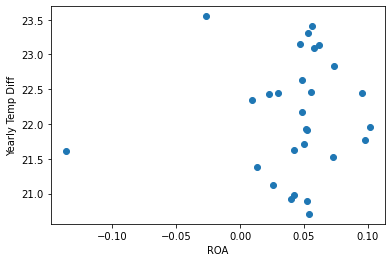


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.026 with 0.960 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


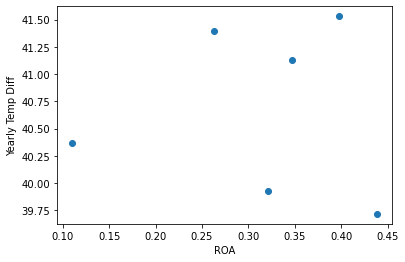

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.158 with 0.607 p-value.
        Spearman coefficient is 0.082 with 0.789 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


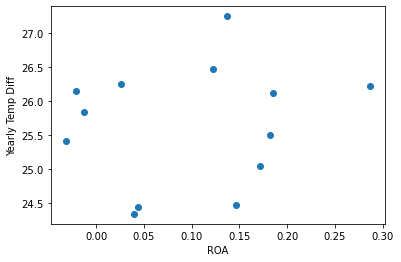


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.193 with 0.334 p-value.
        Spearman coefficient is -0.247 with 0.214 p-value.
        Kendall coefficient is -0.162 with 0.246 p-value.
        


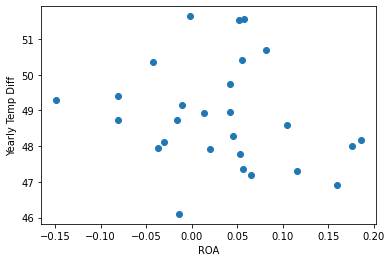

In [21]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(9, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

## 10 Year


Data Insufficient.

Correlation analysis between YTEN and Yearly Temp Diff:
        Perason coefficient is -0.161 with 0.618 p-value.
        Spearman coefficient is -0.049 with 0.880 p-value.
        Kendall coefficient is 0.030 with 0.947 p-value.
        


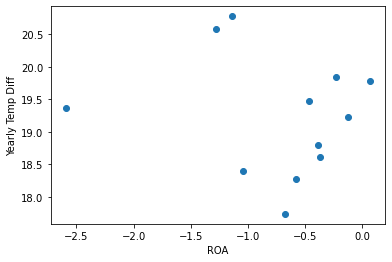

Correlation analysis between AVD and Yearly Temp Diff:
        Perason coefficient is -0.159 with 0.418 p-value.
        Spearman coefficient is -0.216 with 0.270 p-value.
        Kendall coefficient is -0.137 with 0.320 p-value.
        


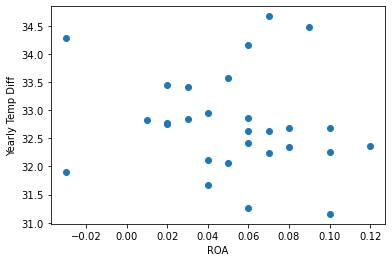


Data Insufficient.

Correlation analysis between IPI and Yearly Temp Diff:
        Perason coefficient is -0.309 with 0.457 p-value.
        Spearman coefficient is -0.238 with 0.570 p-value.
        Kendall coefficient is -0.071 with 0.905 p-value.
        


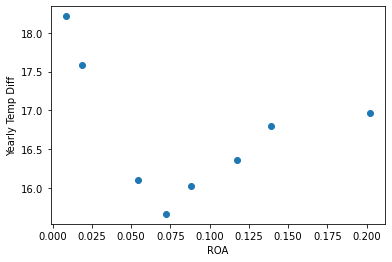

Correlation analysis between MGPI and Yearly Temp Diff:
        Perason coefficient is 0.277 with 0.170 p-value.
        Spearman coefficient is 0.432 with 0.028 p-value.
        Kendall coefficient is 0.317 with 0.023 p-value.
        


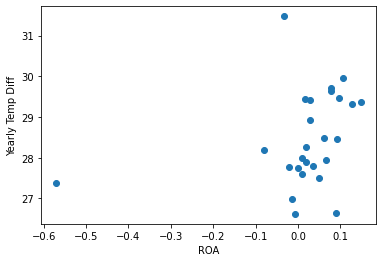

Correlation analysis between SMG and Yearly Temp Diff:
        Perason coefficient is -0.047 with 0.826 p-value.
        Spearman coefficient is -0.014 with 0.949 p-value.
        Kendall coefficient is -0.036 with 0.825 p-value.
        


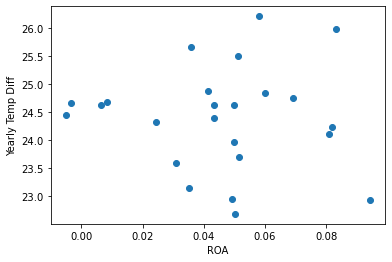

Correlation analysis between FMC and Yearly Temp Diff:
        Perason coefficient is 0.050 with 0.799 p-value.
        Spearman coefficient is 0.182 with 0.353 p-value.
        Kendall coefficient is 0.106 with 0.445 p-value.
        


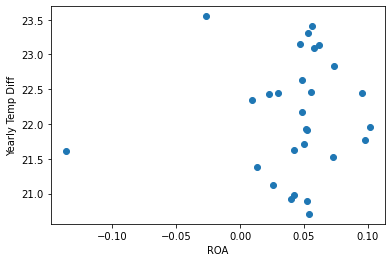


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and Yearly Temp Diff:
        Perason coefficient is -0.026 with 0.960 p-value.
        Spearman coefficient is -0.143 with 0.787 p-value.
        Kendall coefficient is -0.067 with 1.000 p-value.
        


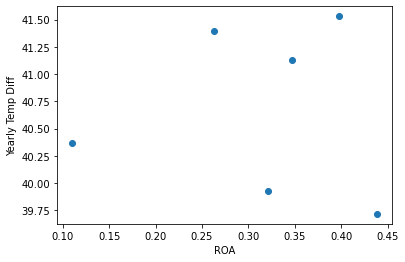

Correlation analysis between CF and Yearly Temp Diff:
        Perason coefficient is 0.158 with 0.607 p-value.
        Spearman coefficient is 0.082 with 0.789 p-value.
        Kendall coefficient is 0.154 with 0.510 p-value.
        


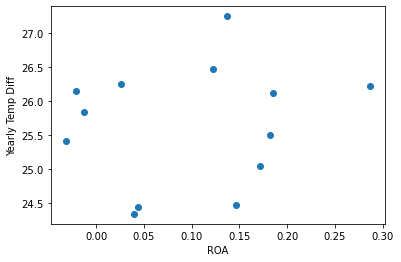


Data Insufficient.

Correlation analysis between MOS and Yearly Temp Diff:
        Perason coefficient is -0.193 with 0.334 p-value.
        Spearman coefficient is -0.247 with 0.214 p-value.
        Kendall coefficient is -0.162 with 0.246 p-value.
        


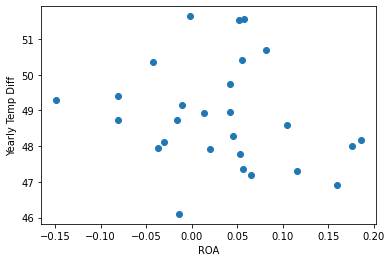

In [22]:
for comp in ROA_data.keys(): 
    temp_data, roa_data = temp_diff_roa_pairs(10, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

In [38]:
temp_diff_roa_pairs

<function __main__.temp_diff_roa_pairs(skip: int, comp)>

# Bushfires

Correlation analysis between RKDA and Bushfire Areas:
        Perason coefficient is 0.448 with 0.227 p-value.
        Spearman coefficient is 0.467 with 0.205 p-value.
        Kendall coefficient is 0.278 with 0.358 p-value.
        


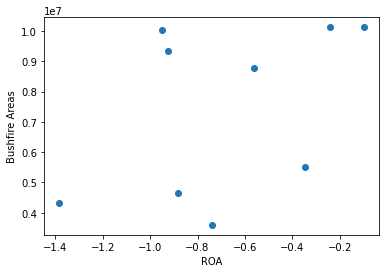

Correlation analysis between YTEN and Bushfire Areas:
        Perason coefficient is 0.383 with 0.116 p-value.
        Spearman coefficient is 0.313 with 0.206 p-value.
        Kendall coefficient is 0.216 with 0.229 p-value.
        


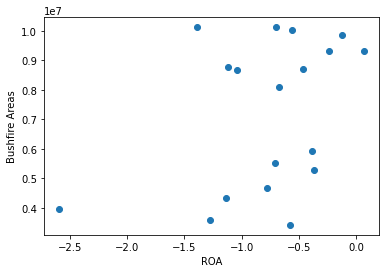

Correlation analysis between AVD and Bushfire Areas:
        Perason coefficient is 0.150 with 0.389 p-value.
        Spearman coefficient is 0.112 with 0.520 p-value.
        Kendall coefficient is 0.072 with 0.558 p-value.
        


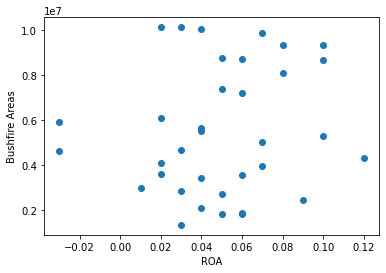


Data Insufficient.

Correlation analysis between IPI and Bushfire Areas:
        Perason coefficient is -0.175 with 0.532 p-value.
        Spearman coefficient is -0.114 with 0.685 p-value.
        Kendall coefficient is -0.029 with 0.923 p-value.
        


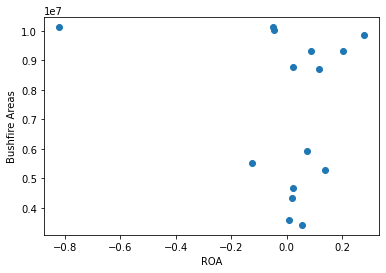

Correlation analysis between MGPI and Bushfire Areas:
        Perason coefficient is 0.046 with 0.801 p-value.
        Spearman coefficient is 0.106 with 0.559 p-value.
        Kendall coefficient is 0.076 with 0.549 p-value.
        


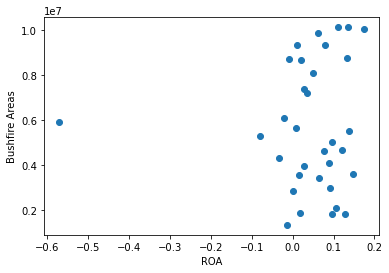

Correlation analysis between SMG and Bushfire Areas:
        Perason coefficient is 0.210 with 0.256 p-value.
        Spearman coefficient is 0.276 with 0.133 p-value.
        Kendall coefficient is 0.209 with 0.103 p-value.
        


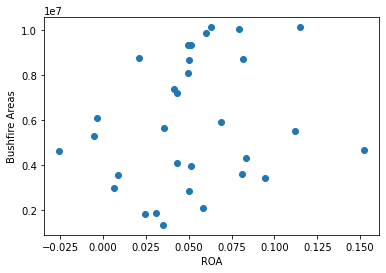

Correlation analysis between FMC and Bushfire Areas:
        Perason coefficient is 0.305 with 0.075 p-value.
        Spearman coefficient is 0.266 with 0.123 p-value.
        Kendall coefficient is 0.170 with 0.151 p-value.
        


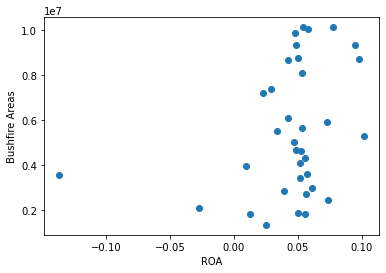

Correlation analysis between MBII and Bushfire Areas:
        Perason coefficient is -0.222 with 0.538 p-value.
        Spearman coefficient is -0.018 with 0.960 p-value.
        Kendall coefficient is -0.022 with 1.000 p-value.
        


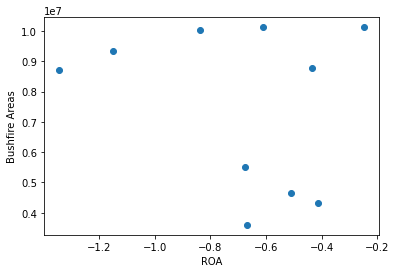


Data Insufficient.

Correlation analysis between UAN and Bushfire Areas:
        Perason coefficient is -0.321 with 0.284 p-value.
        Spearman coefficient is -0.330 with 0.271 p-value.
        Kendall coefficient is -0.231 with 0.306 p-value.
        


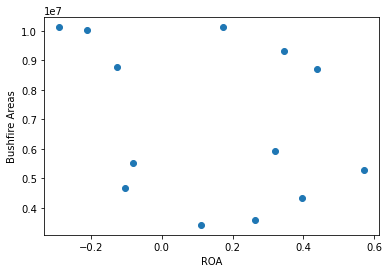

Correlation analysis between CF and Bushfire Areas:
        Perason coefficient is -0.080 with 0.746 p-value.
        Spearman coefficient is -0.004 with 0.989 p-value.
        Kendall coefficient is 0.041 with 0.836 p-value.
        


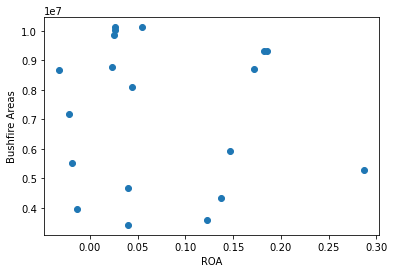


Data Insufficient.

Correlation analysis between MOS and Bushfire Areas:
        Perason coefficient is 0.118 with 0.512 p-value.
        Spearman coefficient is 0.099 with 0.583 p-value.
        Kendall coefficient is 0.082 with 0.505 p-value.
        


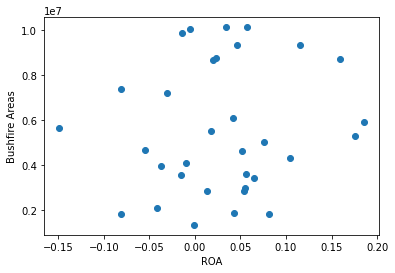

In [23]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        year = i.split('/')[-1]
        
        try: 
            t = bushfire_data.loc[bushfire_data['Year'] == int(year)]['Acres']
            t = int(t.values[0].replace(',', ''))
            if t:
                roa = ROA_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    corr_ana(roa_data, temp_data, 'ROA', 'Bushfire Areas')

### ROA1_Differ V.S. Temp_Differ

In [161]:
import pandas as pd
roa=pd.read_csv('C:\\Users\\melod\\OneDrive\\Desktop\\ROA1_differnce.csv')
roadif = roa[:-7]

In [162]:
cf1 = temp_diff_yearly_data["Difference"][23:]
avd1 = temp_diff_yearly_data["Difference"][7:]
cga1 = temp_diff_yearly_data["Difference"][28:]
fmc1 = temp_diff_yearly_data["Difference"][7:]
mos1 = temp_diff_yearly_data["Difference"][9:]
smg1 = temp_diff_yearly_data["Difference"][11:]
yten1 = temp_diff_yearly_data["Difference"][24:]
ntr1 = temp_diff_yearly_data["Difference"][9:]
mgpi1 = temp_diff_yearly_data["Difference"][9:]
ipi1 = temp_diff_yearly_data["Difference"][27:]
icl1 = temp_diff_yearly_data["Difference"][26:]
uan1 = temp_diff_yearly_data["Difference"][29:]

In [163]:
cfroa1 = roadif["cf_difference"].dropna()
avdroa1 = roadif["AVD_difference"].dropna()
cgaroa1 = roadif["cga_difference"].dropna()
fmcroa1 = roadif["fmc_difference"].dropna()
mosroa1 = roadif["mos_difference"].dropna()
smgroa1 = roadif["smg_difference"].dropna()
ytenroa1 = roadif["yten_difference"].dropna()
ntrroa1 = roadif["ntr_difference"].dropna()
mgpiroa1 = roadif["MGPI_difference"].dropna()
ipiroa1 = roadif["IPI_difference"].dropna()
iclroa1 = roadif["ICL_difference"].dropna()
uanroa1 = roadif["UAN_difference"].dropna()

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.411 with 0.210 p-value.
        Spearman coefficient is -0.336 with 0.312 p-value.
        Kendall coefficient is -0.236 with 0.359 p-value.
        


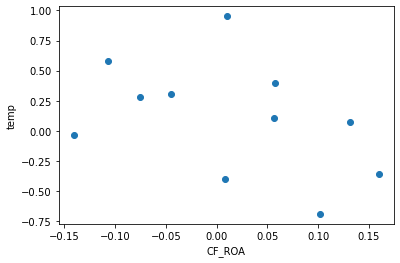

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.106 with 0.597 p-value.
        Spearman coefficient is 0.014 with 0.946 p-value.
        Kendall coefficient is 0.009 with 0.949 p-value.
        


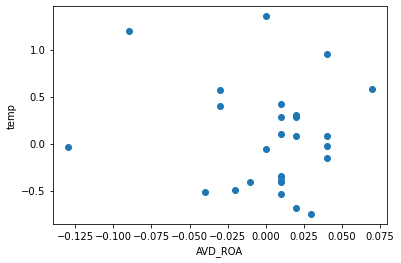

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.781 with 0.067 p-value.
        Spearman coefficient is -0.657 with 0.156 p-value.
        Kendall coefficient is -0.600 with 0.136 p-value.
        


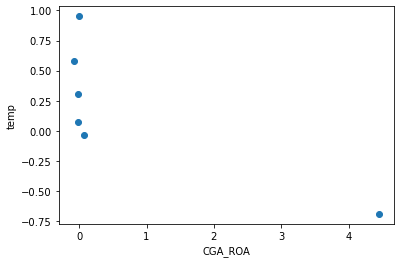

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.077 with 0.701 p-value.
        Spearman coefficient is -0.084 with 0.678 p-value.
        Kendall coefficient is -0.066 with 0.650 p-value.
        


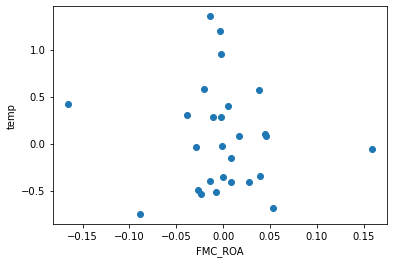

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.075 with 0.721 p-value.
        Spearman coefficient is -0.065 with 0.756 p-value.
        Kendall coefficient is -0.020 with 0.908 p-value.
        


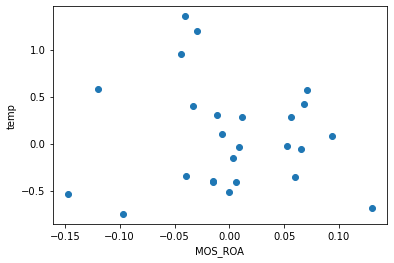

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.005 with 0.983 p-value.
        Spearman coefficient is 0.034 with 0.879 p-value.
        Kendall coefficient is 0.036 with 0.835 p-value.
        


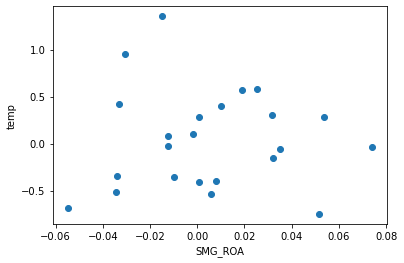

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.116 with 0.749 p-value.
        Spearman coefficient is 0.067 with 0.855 p-value.
        Kendall coefficient is 0.111 with 0.727 p-value.
        


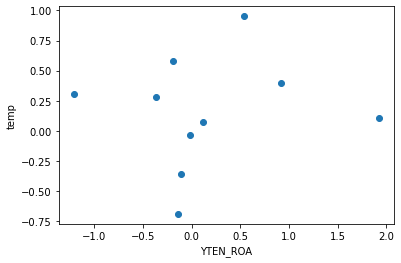

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.197 with 0.344 p-value.
        Spearman coefficient is -0.217 with 0.298 p-value.
        Kendall coefficient is -0.153 with 0.297 p-value.
        


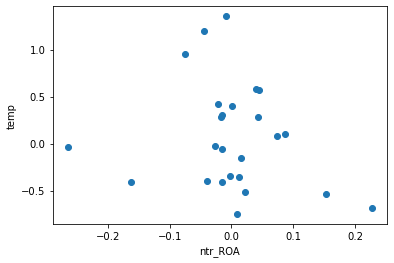

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.177 with 0.399 p-value.
        Spearman coefficient is 0.012 with 0.956 p-value.
        Kendall coefficient is 0.027 with 0.872 p-value.
        


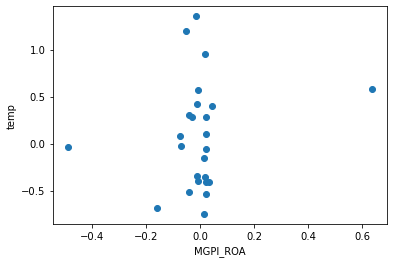

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.305 with 0.506 p-value.
        Spearman coefficient is 0.429 with 0.337 p-value.
        Kendall coefficient is 0.238 with 0.562 p-value.
        


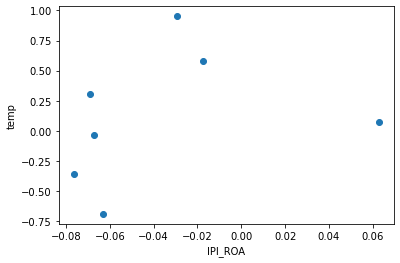

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.404 with 0.321 p-value.
        Spearman coefficient is -0.429 with 0.289 p-value.
        Kendall coefficient is -0.286 with 0.399 p-value.
        


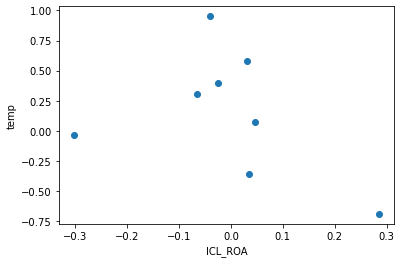


Data Insufficient.



In [164]:
corr_ana(cfroa1, cf1, 'CF_ROA', 'temp')
corr_ana(avdroa1, avd1, 'AVD_ROA', 'temp')
corr_ana(cgaroa1, cga1, 'CGA_ROA', 'temp')
corr_ana(fmcroa1, fmc1, 'FMC_ROA', 'temp')
corr_ana(mosroa1, mos1, 'MOS_ROA', 'temp')
corr_ana(smgroa1, smg1, 'SMG_ROA', 'temp')
corr_ana(ytenroa1, yten1, 'YTEN_ROA', 'temp')
corr_ana(ntrroa1, ntr1, 'ntr_ROA', 'temp')
corr_ana(mgpiroa1, mgpi1, 'MGPI_ROA', 'temp')
corr_ana(ipiroa1, ipi1, 'IPI_ROA', 'temp')
corr_ana(iclroa1, icl1, 'ICL_ROA', 'temp')
corr_ana(uanroa1, uan1, 'UAN_ROA', 'temp')

### ROA2_Differ V.S. Temp_Differ

In [191]:
roa2=pd.read_csv('C:\\Users\\melod\\OneDrive\\Desktop\\ROA2_differnce.csv')
roadif2 = roa2[:-7]

In [194]:
cf2 = temp_diff_yearly_data["Difference"][24:]
avd2 = temp_diff_yearly_data["Difference"][7:]
cga2 = temp_diff_yearly_data["Difference"][30:]
fmc2 = temp_diff_yearly_data["Difference"][7:]
mos2 = temp_diff_yearly_data["Difference"][8:]
smg2 = temp_diff_yearly_data["Difference"][11:]
yten2 = temp_diff_yearly_data["Difference"][25:]
ntr2 = temp_diff_yearly_data["Difference"][9:]
mgpi2 = temp_diff_yearly_data["Difference"][9:]
ipi2 = temp_diff_yearly_data["Difference"][27:]
icl2 = temp_diff_yearly_data["Difference"][26:]
uan2 = temp_diff_yearly_data["Difference"][29:]
seed2 = temp_diff_yearly_data["Difference"][27:]

In [195]:
cfroa2 = roadif2["CF"].dropna()
avdroa2 = roadif2["AVD"].dropna()
cgaroa2 = roadif2["CGA"].dropna()
fmcroa2 = roadif2["FMC"].dropna()
mosroa2 = roadif2["MOS"].dropna()
smgroa2 = roadif2["SMG"].dropna()
ytenroa2 = roadif2["YTEN"].dropna()
ntrroa2 = roadif2["NTR"].dropna()
mgpiroa2 = roadif2["MGPI"].dropna()
ipiroa2 = roadif2["IPI"].dropna()
iclroa2 = roadif2["ICL"].dropna()
uanroa2 = roadif2["UAN"].dropna()
seedroa2 = roadif2["SEED"].dropna()

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.562 with 0.091 p-value.
        Spearman coefficient is -0.564 with 0.090 p-value.
        Kendall coefficient is -0.422 with 0.108 p-value.
        


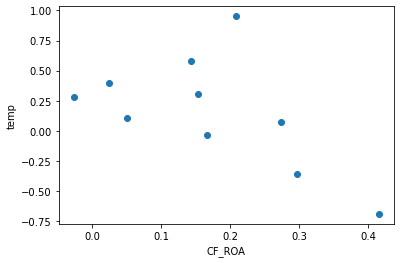

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.246 with 0.217 p-value.
        Spearman coefficient is -0.091 with 0.652 p-value.
        Kendall coefficient is -0.060 with 0.680 p-value.
        


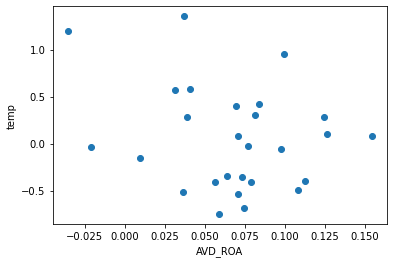


Data Insufficient.

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.050 with 0.805 p-value.
        Spearman coefficient is 0.120 with 0.550 p-value.
        Kendall coefficient is 0.094 with 0.508 p-value.
        


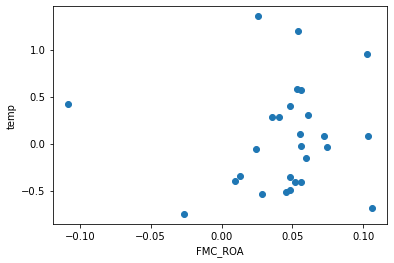

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.073 with 0.724 p-value.
        Spearman coefficient is 0.092 with 0.655 p-value.
        Kendall coefficient is 0.058 with 0.694 p-value.
        


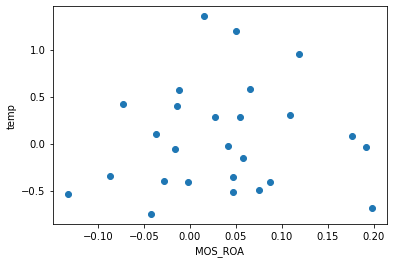

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.330 with 0.125 p-value.
        Spearman coefficient is 0.352 with 0.100 p-value.
        Kendall coefficient is 0.265 with 0.081 p-value.
        


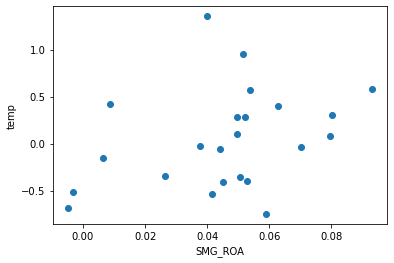

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.084 with 0.830 p-value.
        Spearman coefficient is 0.050 with 0.898 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


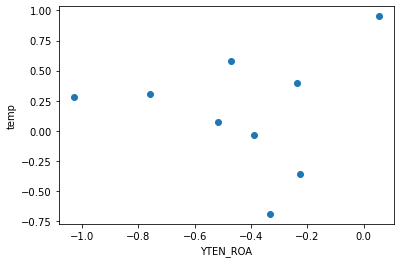

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.037 with 0.861 p-value.
        Spearman coefficient is 0.192 with 0.359 p-value.
        Kendall coefficient is 0.153 with 0.297 p-value.
        


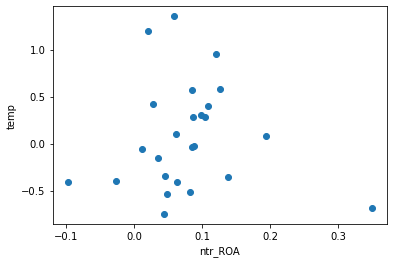

Correlation analysis between YTEN and temp:
        Perason coefficient is 0.005 with 0.979 p-value.
        Spearman coefficient is -0.069 with 0.742 p-value.
        Kendall coefficient is -0.047 with 0.764 p-value.
        


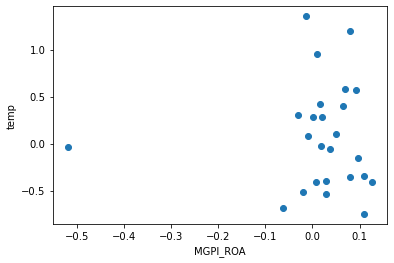

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.754 with 0.050 p-value.
        Spearman coefficient is -0.679 with 0.094 p-value.
        Kendall coefficient is -0.524 with 0.136 p-value.
        


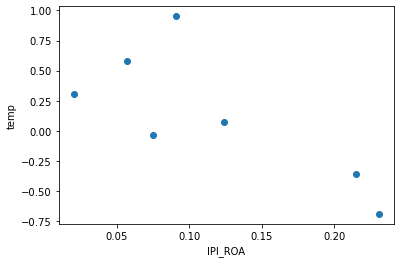

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.624 with 0.098 p-value.
        Spearman coefficient is -0.214 with 0.610 p-value.
        Kendall coefficient is -0.143 with 0.720 p-value.
        


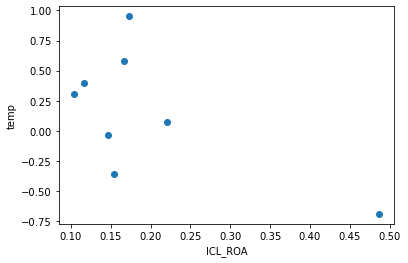


Data Insufficient.



In [196]:
corr_ana(cfroa2, cf2, 'CF_ROA', 'temp')
corr_ana(avdroa2, avd2, 'AVD_ROA', 'temp')
corr_ana(cgaroa2, cga2, 'CGA_ROA', 'temp')
corr_ana(fmcroa2, fmc2, 'FMC_ROA', 'temp')
corr_ana(mosroa2, mos2, 'MOS_ROA', 'temp')
corr_ana(smgroa2, smg2, 'SMG_ROA', 'temp')
corr_ana(ytenroa2, yten2, 'YTEN_ROA', 'temp')
corr_ana(ntrroa2, ntr2, 'ntr_ROA', 'temp')
corr_ana(mgpiroa2, mgpi2, 'MGPI_ROA', 'temp')
corr_ana(ipiroa2, ipi2, 'IPI_ROA', 'temp')
corr_ana(iclroa2, icl2, 'ICL_ROA', 'temp')
corr_ana(uanroa2, uan2, 'UAN_ROA', 'temp')

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.106 with 0.597 p-value.
        Spearman coefficient is 0.014 with 0.946 p-value.
        Kendall coefficient is 0.009 with 0.949 p-value.
        


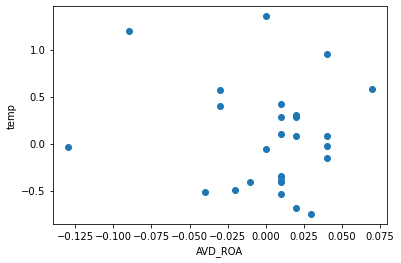

Correlation analysis between YTEN and temp:
        Perason coefficient is -0.246 with 0.217 p-value.
        Spearman coefficient is -0.091 with 0.652 p-value.
        Kendall coefficient is -0.060 with 0.680 p-value.
        


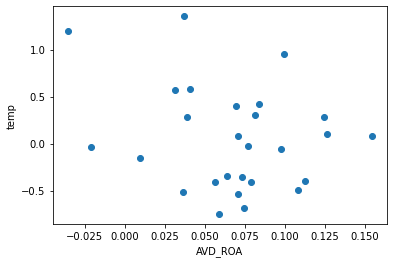

In [200]:
corr_ana(avdroa1, avd1, 'AVD_ROA', 'temp')
corr_ana(avdroa2, avd2, 'AVD_ROA', 'temp')

In [ ]:
corr_ana(cfroa1, cf1, 'CF_ROA', 'temp')
corr_ana(cfroa2, cf2, 'CF_ROA', 'temp')

# Appendix

## Person

$$
r=\frac{\sum\left(x-m_{x}\right)\left(y-m_{y}\right)}{\sqrt{\sum\left(x-m_{x}\right)^{2} \sum\left(y-m_{y}\right)^{2}}}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

## Spearman

$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$

$\rho$ 	=	Spearman's rank correlation coefficient  
$d_i$ = difference between the two ranks of each observation  
$n$ = number of observations

REF1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html  
REF2: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

## Kendall

$$
\tau=\frac{(\text { number of concordant pairs })-(\text { number of discordant pairs })}{\left(\begin{array}{c}
n \\
2
\end{array}\right)}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html?highlight=kendall#scipy.stats.kendalltau